In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [2]:
raw_df = pd.read_csv('./new12.csv')
raw_df = raw_df['fp1']
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(10)

0   -1088.650757
1   -1088.488159
2   -1088.336426
3   -1088.336914
4   -1088.652344
5   -1089.420410
6   -1090.710815
7   -1092.499390
8   -1094.671753
9   -1097.055664
Name: fp1, dtype: float64

In [3]:
ekg_data_segment = raw_df
segment_len = 20
slide_len = 20

segments = []
for start_pos in range(0, len(ekg_data_segment), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data_segment[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 3000 waveform segments


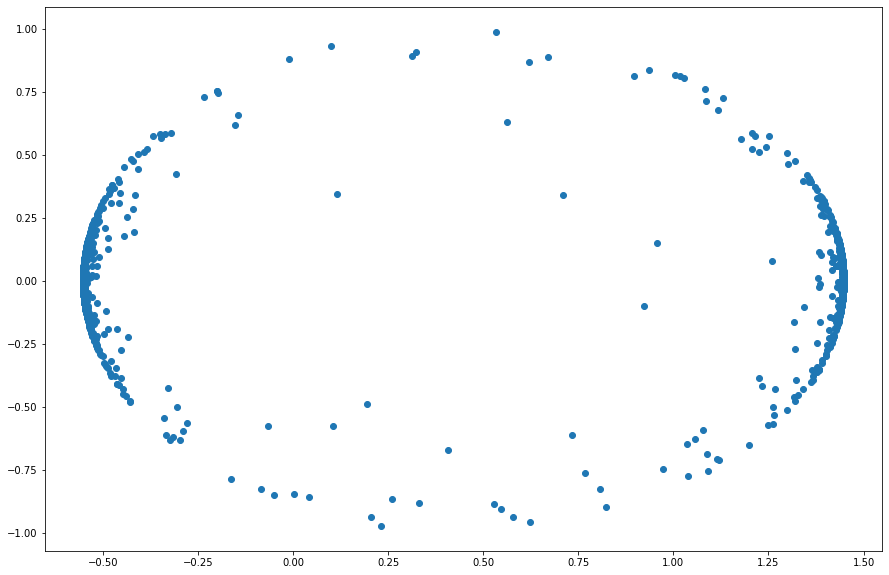

In [4]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(segments) 

# Normalizing the Data 
# scaler= MinMaxScaler()
# scaler.fit(scaled_df) 
# normalized_df=scaler.transform(scaled_df)
normalized_df = normalize(scaled_df) 
  



# # Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)
plt.figure(figsize =(15, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'])

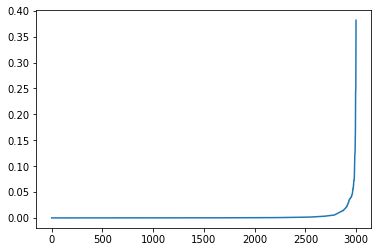

In [6]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

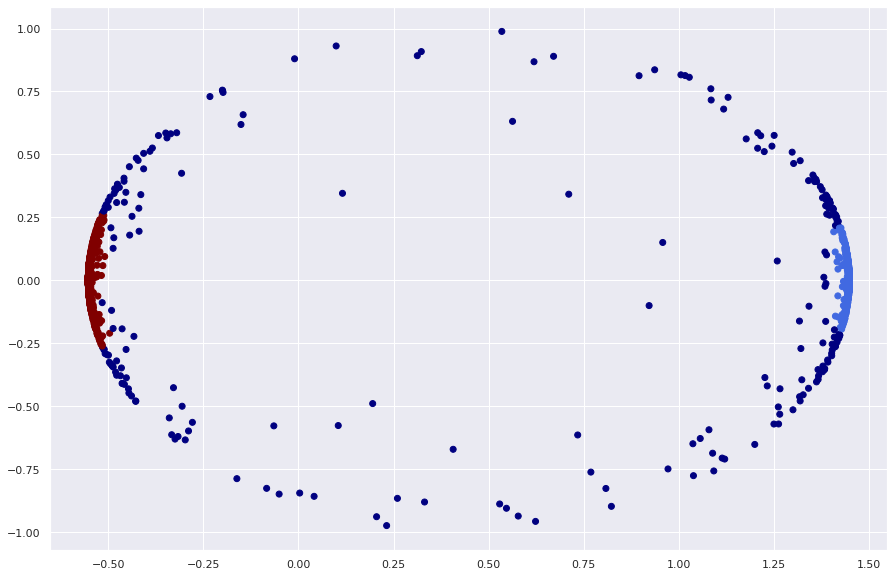

In [62]:
m = DBSCAN(eps=0.025, min_samples=15)
m.fit(X_principal)
clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.figure(figsize =(15, 10)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c=vectorizer(clusters))